## Set up Environment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Dataset

In [2]:
df = pd.read_csv('/Users/dejicuomu/Desktop/medical data/medical_examination.csv')


## Exploring Data

In [3]:
# Display the shape and type of the DataFrame
df.shape

(70000, 13)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
# Display data types of each column
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
# Create a new column 'overweight' based on BMI
df['overweight'] = (df['weight'] / (df['height'] / 100) ** 2 > 25).astype(int)
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

## Visualizing Data

In [7]:
# Plot categorical data
def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat['total'] = 1
    df_cat = df_cat.groupby(['cardio', 'variable', 'value'], as_index=False).count()
    df_cat.rename(columns={'total': 'total_patients'}, inplace=True)

    # Plot categorical data
   
    g = sns.catplot(x='variable', y='total_patients', hue='value', col='cardio', data=df_cat, kind='bar', ci=None, height=5, aspect=0.8)
    g.set_axis_labels('Variables', 'Total Patients')
    g.set_xticklabels(rotation=45)
    g.set_titles("{col_name} {col_var}")
    g.legend.set_title('Value')
    fig = g.fig
    


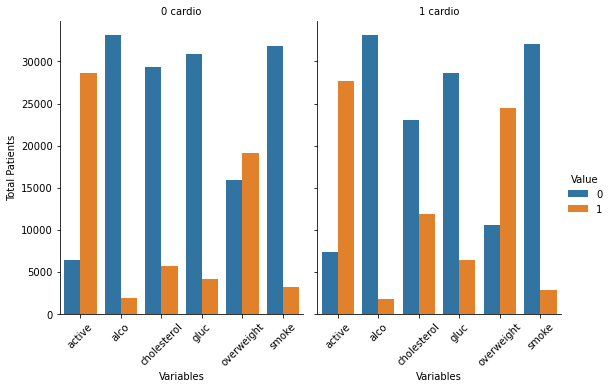

In [8]:
draw_cat_plot()

In [9]:
# Filtering the dataframe based on specified criteria

def draw_heat_map():
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
                 (df['height'] >= df['height'].quantile(0.025)) &
                 (df['height'] <= df['height'].quantile(0.975)) &
                 (df['weight'] >= df['weight'].quantile(0.025)) &
                 (df['weight'] <= df['weight'].quantile(0.975))]
    # Calculating the correlation matrix
    corr = df_heat.corr()

    # Creating a mask for the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Setting up the heatmap figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Generating the heatmap using seaborn
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
    
    
    

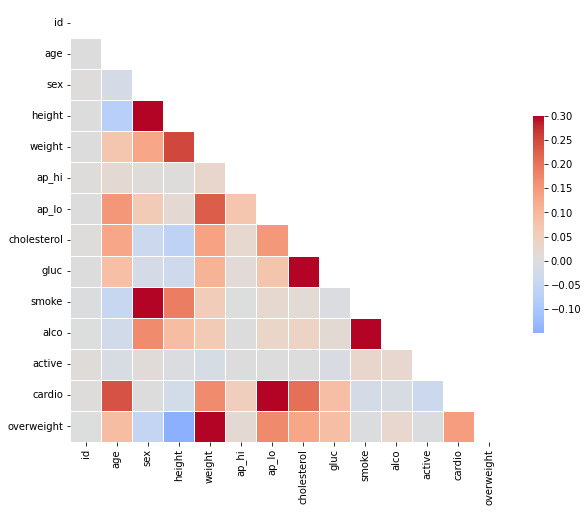

In [10]:
draw_heat_map()